<a href="https://colab.research.google.com/github/housekjh1/study-pandas/blob/main/1019_chap_4_5_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd

In [55]:
pd.__version__

'1.5.3'

In [56]:
employees = pd.read_csv("employees.csv") # 우선 불러오기

In [57]:
employees["Start Date"] = pd.to_datetime(employees["Start Date"]) # 불러와서 단일 컬럼에 데이터형 변환 -> 모든 판다스 버전에 대응됨 # 시간/날짜는 별도처리라서 .astype() 사용불가

In [58]:
employees["Mgmt"] = employees["Mgmt"].astype(bool)

In [59]:
# employees["Salary"] = employees["Salary"].astype(int) # NaN이 포함되어 있으면 형변환 불가

In [60]:
employees["Salary"] = employees["Salary"].fillna(0).astype(int) # NaN를 0으로 모두 채우기

In [61]:
employees["Gender"] = employees["Gender"].astype("category")

In [62]:
employees["Team"] = employees["Team"].astype("category")

In [63]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    category      
dtypes: bool(1), category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 27.0+ KB


In [64]:
# employees.dropna(thresh=3).info()
# (~employees["Team"].duplicated()).head()

## Chap08

In [65]:
import pandas as pd
pd.__version__

'1.5.3'

In [70]:
sales = pd.read_csv("sales_by_employee.csv", parse_dates=["Date"])

In [73]:
sales.head()

,Date,Name,Customer,Revenue,Expenses
0,2020-01-01,Oscar,Logistics XYZ,5250,531
1,2020-01-01,Oscar,Money Corp.,4406,661
2,2020-01-02,Oscar,PaperMaven,8661,1401
3,2020-01-03,Oscar,PaperGenius,7075,906
4,2020-01-04,Oscar,Paper Pound,2524,1767


In [84]:
sales.pivot_table(index="Date", aggfunc="sum", values="Revenue", columns="Name", fill_value=0, margins=True, margins_name="Total")

Name,Creed,Dwight,Jim,Michael,Oscar,Total
Date,,,,,,
2020-01-01 00:00:00,4430,2639,1864,7172,9656,25761
2020-01-02 00:00:00,13214,0,8278,6362,8661,36515
2020-01-03 00:00:00,0,11912,4226,5982,7075,29195
2020-01-04 00:00:00,3144,0,6155,7917,2524,19740
2020-01-05 00:00:00,938,7771,0,7837,2793,19339
Total,21726,22322,20523,35270,30709,130550


## 통계청

In [146]:
import pandas as pd
import numpy as np

In [87]:
pd.__version__

'1.5.3'

In [89]:
df = pd.read_csv("2022_출생.csv", encoding="cp949")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Columns: 937 entries, 시군구별 to 2022.12.2
dtypes: object(937)
memory usage: 139.2+ KB


In [90]:
df.head()

,시군구별,1997.01,1997.01.1,1997.01.2,1997.02,1997.02.1,1997.02.2,1997.03,1997.03.1,1997.03.2,...,2022.09.2,2022.10,2022.10.1,2022.10.2,2022.11,2022.11.1,2022.11.2,2022.12,2022.12.1,2022.12.2
0,시군구별,계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),...,여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명),계 (명),남자 (명),여자 (명)
1,전국,63268,33266,30002,58144,30086,28058,62160,32333,29827,...,10715,20646,10530,10116,18981,9737,9244,16896,8684,8212
2,서울특별시,13205,6886,6319,12239,6224,6015,13358,6947,6411,...,1831,3612,1794,1818,3230,1678,1552,2901,1472,1429
3,부산광역시,4201,2260,1941,3910,2104,1806,4304,2234,2070,...,575,1166,602,564,977,479,498,957,528,429
4,대구광역시,3345,1764,1581,2994,1608,1386,3337,1815,1522,...,416,848,428,420,802,406,396,663,334,329


In [105]:
df_melt = df.melt(id_vars="시군구별")

In [106]:
df["시군구별"].unique()

array(['시군구별', '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [107]:
df_melt = df_melt[df_melt["시군구별"] != "시군구별"]

In [109]:
df_melt["시군구별"].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [111]:
df_melt.head()

,시군구별,variable,value
1,전국,1997.01,63268
2,서울특별시,1997.01,13205
3,부산광역시,1997.01,4201
4,대구광역시,1997.01,3345
5,인천광역시,1997.01,3646


In [120]:
df_melt["연도"] = df_melt["variable"].str.split('.', expand=True)[0]
df_melt["월"] = df_melt["variable"].str.split('.', expand=True)[1]
df_melt["성별"] = df_melt["variable"].str.split('.', expand=True)[2]

In [124]:
df_melt["성별"] = df_melt["성별"].fillna("전체")

In [129]:
df_melt["성별"] = df_melt["성별"].replace('1', '남자').replace('2', '여자')

In [130]:
df_melt["성별"].unique()

array(['전체', '남자', '여자'], dtype=object)

In [133]:
df_melt = df_melt.rename(columns={"variable":"기간", "value":"출생아수"})

In [135]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    16848 non-null  object
 1   기간      16848 non-null  object
 2   출생아수    16848 non-null  object
 3   연도      16848 non-null  object
 4   월       16848 non-null  object
 5   성별      16848 non-null  object
dtypes: object(6)
memory usage: 1.4+ MB


In [145]:
df_melt.head(10)

,시군구별,기간,출생아수,연도,월,성별
1,전국,1997.01,63268,1997,01,전체
2,서울특별시,1997.01,13205,1997,01,전체
3,부산광역시,1997.01,4201,1997,01,전체
4,대구광역시,1997.01,3345,1997,01,전체
5,인천광역시,1997.01,3646,1997,01,전체
6,광주광역시,1997.01,2166,1997,01,전체
7,대전광역시,1997.01,2003,1997,01,전체
8,울산광역시,1997.01,1754,1997,01,전체
9,세종특별자치시,1997.01,-,1997,01,전체
10,경기도,1997.01,13440,1997,01,전체


In [149]:
df_melt["출생아수"] = df_melt["출생아수"].replace('-', np.nan).astype(float) # 세종시는 갑툭튀, 출생아수를 0 또는 음수를 사용할 수 없어 NaN으로 대체

In [151]:
df_melt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16848 entries, 1 to 17783
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군구별    16848 non-null  object 
 1   기간      16848 non-null  object 
 2   출생아수    16308 non-null  float64
 3   연도      16848 non-null  object 
 4   월       16848 non-null  object 
 5   성별      16848 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.4+ MB


In [152]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.4 MB/s eta 0:00:00


In [155]:
df_a = (df_melt["시군구별"] == "전국") & (df_melt["성별"] == "전체")
df_all = df_melt[df_a]

In [161]:
df_all = df_all[["연도", "월", "출생아수"]]

In [162]:
df_all

,연도,월,출생아수
1,1997,01,63268.0
58,1997,02,58144.0
115,1997,03,62160.0
172,1997,04,56949.0
229,1997,05,55270.0
...,...,...,...
17500,2022,08,21782.0
17557,2022,09,21918.0
17614,2022,10,20646.0
17671,2022,11,18981.0


In [163]:
import matplotlib.pyplot as plt

<Axes: xlabel='연도'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50500 (\N{HANGUL SYLLABLE A}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*arg

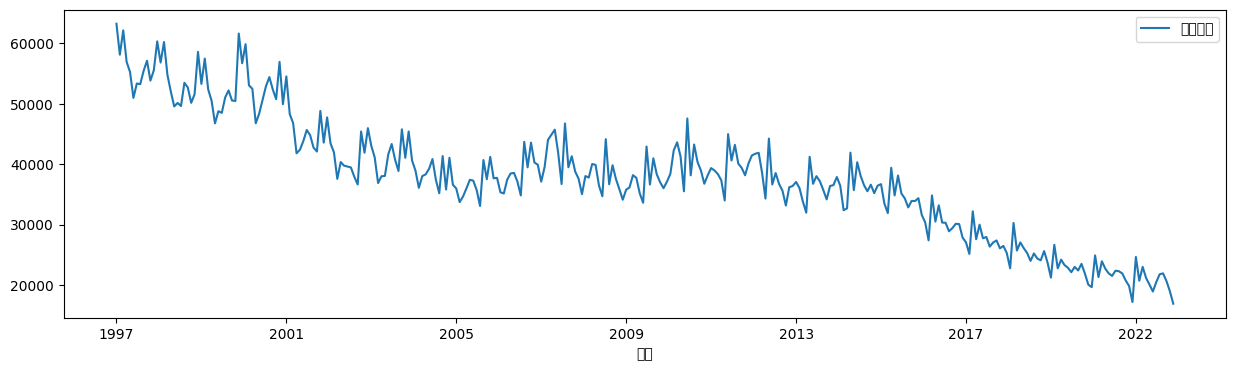

In [170]:
df_all.set_index(["연도"]).plot(figsize=(15,4))